<a href="https://colab.research.google.com/github/Faraazmanb/Faraazman-Bootcamp-FinalCase/blob/main/Social_mediaa_sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align:center; font-size:50px;">
    <b>HATE COMMENT DETECTION</b>
</div>


---

# Importing Dependencies

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use(["seaborn"])
import seaborn as sns


<ipython-input-5-9c1961bb7665>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(["seaborn"])


# CREATING DATAFRAME OBJECT

In [6]:
from google.colab import files

# Upload the dataset file
uploaded = files.upload()


Saving twitter_data.csv to twitter_data (2).csv


In [7]:
import pandas as pd

# Read the uploaded CSV file into a DataFrame
df = pd.read_csv("twitter_data.csv")
df.head()
# Now you can work with the DataFrame 'df' in your Colab notebook


,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


# Selecting Features

In [8]:
df=df[['class','tweet']]
df

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24773,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24774,2,"you've gone and broke the wrong heart baby, an..."
24775,1,young buck wanna eat!!.. dat nigguh like I ain...
24776,1,youu got wild bitches tellin you lies


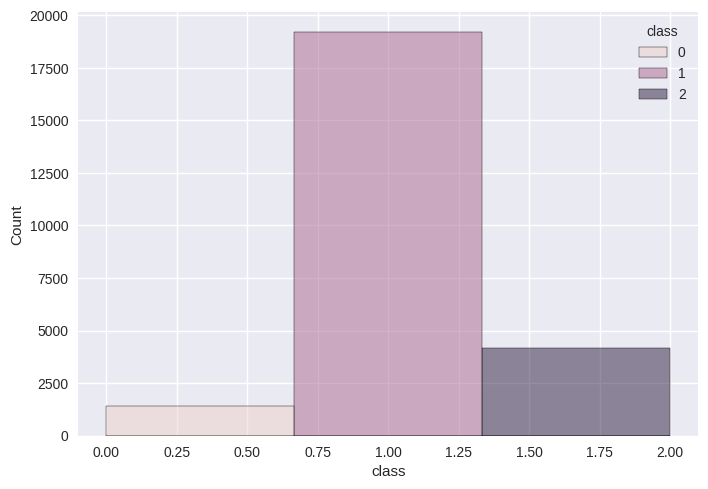

(None,)

In [9]:
sns.histplot(data=df,x="class",bins=3,hue="class")
plt.show(),

# Preprocessing text column

### Importing sub dependencies

In [10]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [11]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Defining a new column

In [12]:
corpus=[]
df['corpus']=df['class']
df

,class,tweet,corpus
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...,...
24773,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
24774,2,"you've gone and broke the wrong heart baby, an...",2
24775,1,young buck wanna eat!!.. dat nigguh like I ain...,1
24776,1,youu got wild bitches tellin you lies,1


### Getting stopwords

In [13]:
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

### Function to convert

#### Text Preprocessing and Stemming

In [26]:
a=df["tweet"][0]
a=re.sub("[^a-zA-Z']", " ", a).lower()
a=a.split()
stemmed_words = [ps.stem(word) for word in a if word not in stop_words]
stemmed_words

['rt',
 'mayasolov',
 'woman',
 'complain',
 'clean',
 'hous',
 'amp',
 'man',
 'alway',
 'take',
 'trash']

In [27]:
ps=PorterStemmer()

# Function to preprocess and stem text
def preprocess_text(text):
    # Remove special characters and convert to lowercase
    cleaned_text = re.sub("[^a-zA-Z']", " ", text).lower()                        #1 cleaning (Removing Special Characters & Lowercasing)

    # Split the cleaned text into words
    words = cleaned_text.split()                                                  #2 spliting (converting text to list) AKA Tokenization

    # Stem and remove stopwords
    stemmed_words = [ps.stem(word) for word in words if word not in stop_words]    #3 stemming & Stopword Removal

    # Join the stemmed words back into a sentence
    return ' '.join(stemmed_words)                                                 #4 Converting list of words again back to string (Reconstruction)

# Apply the preprocessing function to the 'text' column


In [28]:
df.corpus=df["tweet"].apply(preprocess_text)

In [29]:
df

,class,tweet,corpus
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,rt mayasolov woman complain clean hous amp man...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,rt mleew boy dat cold tyga dwn bad cuffin dat ...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,rt urkindofbrand dawg rt sbabi life ever fuck ...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,rt c g anderson viva base look like tranni
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,rt shenikarobert shit hear might true might fa...
...,...,...,...
24773,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,you' muthaf lie lifeask pearl corey emanuel ri...
24774,2,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart babi drove redneck crazi
24775,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wanna eat dat nigguh like aint fuck...
24776,1,youu got wild bitches tellin you lies,youu got wild bitch tellin lie


## CountVectorization

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(df['corpus']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Analysing CountVectorizer Result


In [31]:
(cv.get_feature_names_out()).__len__()

30519

In [32]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [33]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [34]:
x.shape

(24778, 30519)

In [35]:
y=df['class'].value_counts
y


<bound method IndexOpsMixin.value_counts of 0        2
1        1
2        1
3        1
4        1
        ..
24773    1
24774    2
24775    1
24776    1
24777    2
Name: class, Length: 24778, dtype: int64>

# CREATING A BAG OF WORDS MODEL

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB  # Import Multinomial Naive Bayes


results = []

X_TO_SCORE = x  # Replace 'X' with your feature matrix
Y_TO_SCORE = y  # Replace 'y' with your target variable for classification

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('Multinomial Naive Bayes', MultinomialNB())  # Include Multinomial Naive Bayes
]

for name, model in models:
    model.fit(X_TO_SCORE, Y_TO_SCORE)

    results.append(
        {
            "model": name,
            "Cross_Validation_Score": (cross_val_score(model, X_TO_SCORE, Y_TO_SCORE, cv=3)).mean()
        }
    )

re_df = pd.DataFrame(results)
print(re_df)

# Displaying Results

In [ ]:
re_df

# Re-tuned code

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
from tqdm import tqdm  # Import tqdm for progress tracking

# Create an empty DataFrame to store confusion matrices
confusion_matrices = pd.DataFrame(columns=['Model', 'Confusion_Matrix'])

results = []

X_TO_SCORE = x  # Replace 'X' with your feature matrix
Y_TO_SCORE = y  # Replace 'y' with your target variable for classification

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('SVM - Linear Kernel', SVC(kernel='linear')),               # Linear kernel for text classification
    ('SVM - RBF Kernel', SVC(kernel='rbf')),                     # RBF kernel (Gaussian) for text classification
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Gaussian Naive Bayes', GaussianNB()),                      # Gaussian Naive Bayes for text classification
    ('Complement Naive Bayes', ComplementNB()),                  # Complement Naive Bayes for text classification
    ('Bernoulli Naive Bayes', BernoulliNB())                     # Bernoulli Naive Bayes for text classification
]

# Initialize tqdm to track progress
for name, model in tqdm(models, desc='Processing Models'):
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_TO_SCORE, Y_TO_SCORE, cv=3)

    # Make predictions using cross-validation
    y_pred = cross_val_predict(model, X_TO_SCORE, Y_TO_SCORE, cv=3)

    # Calculate confusion matrix
    cm = confusion_matrix(Y_TO_SCORE, y_pred)


    results.append(
        {
            "model": name,
            "Cross_Validation_Score": cv_scores.mean(),
            "Accuracy": accuracy
        }
    )

    # Append confusion matrix to the separate DataFrame
    confusion_matrices = confusion_matrices.append({'Model': name, 'Confusion_Matrix': cm}, ignore_index=True)

re_df = pd.DataFrame(results)


In [ ]:
re_df

In [ ]:
re_df.sort_values(by='Cross_Validation_Score')

In [ ]:
confusion_matrices


# Visualizing Confusion Matrix

In [ ]:
import seaborn as sns
for i,j in confusion_matrices.values:

    plt.figure()
    sns.heatmap(j,annot=True)
    plt.title(i)

# Trying to improve accuracy

In [ ]:

# Initialize a new column 'corpus' with empty strings
df['corpus_new'] = ""
df

In [ ]:
negative_words = set([
    "weren't", "no", "can't", "mustn", "hasn", "haven't", "didn't", "wasn't", "wouldn't", "isn't","doesn",'t','isn','off','don't'
    "shouldn't", "shan't", "mightn't", "aren't", "won't", "hadn't", "not", "hadn't"
])


In [ ]:
stopwords=stopwords-{'t'}

In [ ]:
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Define a list of negative words to retain
negative_words = set([
    "weren't", "no", "can't", "mustn", "hasn", "haven't", "didn't", "wasn't", "wouldn't", "isn't",
    "shouldn't", "shan't", "mightn't", "aren't", "won't", "hadn't", "not", "hadn't"
])

# Function to preprocess and stem text
def preprocess_text(text):
    # Remove special characters and convert to lowercase
    text=text.lower()
    cleaned_text = re.sub("[^a-zA-Z']", " ", text)

    # Split the cleaned text into words
    words = cleaned_text.split()

    # Stem and remove stopwords, excluding negative words
    stemmed_words = [ps.stem(word) if word not in negative_words else word for word in words if word not in stop_words]

    # Join the stemmed words back into a sentence
    return ' '.join(stemmed_words)
"""
# Function to preprocess and stem text
def preprocess_text(text):
    # Remove special characters and convert to lowercase
    text=text.lower()
    # Split the cleaned text into words
    words = text.split()
    words = re.sub("[^a-zA-Z']", " ", text)

    # Stem and remove stopwords, excluding negative words
    stemmed_words = [ps.stem(word) if word not in negative_words else word for word in words if word not in stop_words]

    # Join the stemmed words back into a sentence
    return ' '.join(stemmed_words)
"""
# Apply the preprocessing function to the 'text' column
df['corpus_new'] = df['text'].apply(preprocess_text)


In [ ]:
df

In [ ]:
df["res"]=df["corpus"]==df['corpus_new']

In [ ]:
df

In [ ]:
df['res'].value_counts()

In [ ]:
df[['corpus',"corpus_new"]].iloc[df.res==False]